<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Built-in iterators



# Iterators
<hr style = "border:2px solid black" ></hr>


- `range` is not a list, but an **iterator**.



In [2]:
for i in range(10):
    # end = " " allows use to print in a single row
    print(i, end = ' ')

0 1 2 3 4 5 6 7 8 9 


- When you write something like `for val in L`, the Python interpreter checks whether it has an iterator interface, which you can check yourself with the built-in iter function: 
- It is this iterator object that provides the functionality required by the `for` loop.
- The `iter` object is a container that gives you access to the next object for as long as it's valid, which can be seen with the built-in function `next`,


- **What is the purpose of all of this?** 
    - It allows Python to treat things as lists that are *not actually lists*.
    - The benefit of the iterator indirection is that the full list is **never** explicitly created! **Save in memory**.



In [3]:
for value in [2, 4, 6, 8, 10]:
    # do some operation
    print(value + 1, end=' ')

3 5 7 9 11 

In [4]:
iter([2, 4, 6, 8, 10])

In [5]:
I = iter([2, 4, 6, 8, 10])

In [6]:
print(next(I))

2


In [7]:
print(next(I))

4


In [8]:
print(next(I))

6



- The most common example of this **indirect iteration** is the `range()` function in Python 3 
- This returns not a list, but a special `range()` object:



In [9]:
range(10)

range(0, 10)

In [9]:
# range, like a list, exposes an iterator:
iter(range(10))

In [10]:
# so Python knows to treat it as if it's a list:
for i in range(10):
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 


- The benefit of the iterator indirection is that **the full list is never explicitly created!**
- We can see this by doing a range calculation that would **exahust** our system memory if we actually instantiated it (note that in Python 2, ``range`` creates a list, so running the following will not lead to good things!):



In [11]:
# This is one trillion!
N = 10 ** 12
for i in range(N):
    if i >= 10: break
    print(i, end=', ')

1000000.0
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

In [12]:
# Python's itertools library contains a count function that acts as an infinite range:
from itertools import count

for i in count():
    if i >= 10:
        # Use a break otherwise it will never finish
        break
    print(i, end = ', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

# `enumerate`
<hr style = "border:2px solid black" ></hr>

In [12]:
# Work but it is not very pythonic
L = [2, 4, 6, 8, 10]
for i in range(len(L)):
    print(i, L[i])

0 2
1 4
2 6
3 8
4 10


In [13]:
# The pythonic way of doing it
for i, val in enumerate(L):
    print(i, val)

0 2
1 4
2 6
3 8
4 10


# `zip`
<hr style = "border:2px solid black" ></hr>

In [27]:
L = [2, 4, 6, 8, 10]
R = [3, 6, 9, 12, 15]
# zip zips together iterables
for lval, rval in zip(L, R):
    print(lval, rval)

2 3
4 6
6 9
8 12
10 15



- The ``map`` and ``filter`` functions, along with the ``reduce`` function (which lives in Python's ``functools`` module) are fundamental components of the **functional programming**.
- This style, which, while not a dominant programming style in the Python world, has its outspoken proponents.



# `map`
<hr style = "border:2px solid black" ></hr>


- The map iterator takes a function and applies it to the values in an iterator.
    
- Find the first 10 square numbers.



In [16]:
def square(x): return x ** 2


for val in map(square, range(10)):
    print(val, end=' ')

0 1 4 9 16 25 36 49 64 81 

# `filter`
<hr style = "border:2px solid black" ></hr>


- The filter iterator looks similar, except it only passes-through values  for which the filter function evaluates to True:
- Find values up to 10 for which x % 2 is zero



In [17]:
def is_even(x): return x % 2 == 0


for val in filter(is_even, range(10)):
    print(val, end=' ')

0 2 4 6 8 

# `reduce`
<hr style = "border:2px solid black" ></hr>


- `reduce` is a tool that is typically associated with functional programming, which is a programming paradigm that I feel sometimes is underappreciated. In a short sentence, reduce takes an iterable and a binary function (a function that takes two arguments), and then uses that binary function to boil the iterable down to a single value.

- A concrete example is the function `sum` which is a reduction. 

- Keep in mind that part of what a reduction does is taking an iterable and reducing it to a single value. 
    


In [3]:
sum(range(10))

45

In [4]:
from functools import reduce; import operator
reduce(operator.add, range(10))

45

In [1]:
from math import prod
prod(range(1, 11))

3628800

In [5]:
reduce(operator.mul, range(1, 11))

3628800

In [6]:
#  Now, say that you want to access the nested 42 through a series of successive 
#  key accesses that you have in a list:
d = {"one": {2: {"c": {4: 42}}}}
keys = ["one", 2, "c", 4]

val = d
for key in keys:
    val = val[key]
val

42

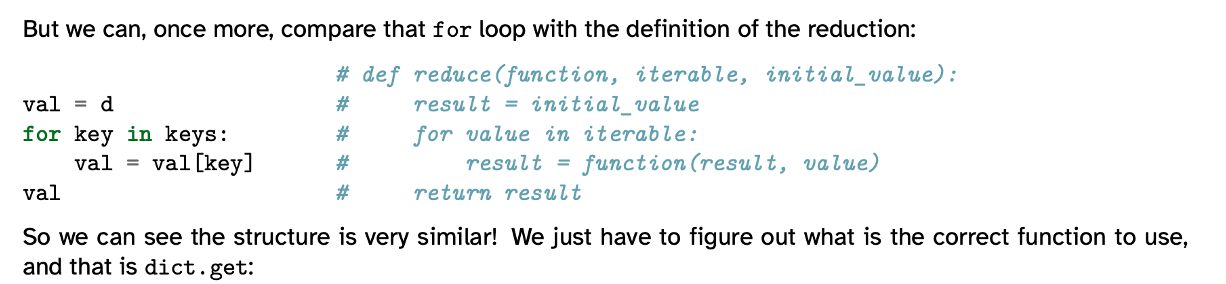

In [7]:
reduce(dict.get, keys, d)

42

# Iterators as function arguments
<hr style = "border:2px solid black" ></hr>

In [18]:
# *args syntax works not just with sequences, but with any iterator:
print(*range(10))

0 1 2 3 4 5 6 7 8 9



- This means that problem like the one before "find values up to 10 for which x % 2 is zero" can be reduced down to



In [19]:
print(*map(lambda x: x ** 2, range(10)))

0 1 4 9 16 25 36 49 64 81


# Why there is no `unzip` method in python?
<hr style = "border:2px solid black" ></hr>


- Because the opposite of `zip()` is `zip()`! 
- The key is that `zip()` can zip-together any number of iterators or sequences.



In [19]:
L1 = (1, 2, 3, 4)
L2 = ('a', 'b', 'c', 'd')

In [23]:
z = zip(L1, L2)
print(*z)

(1, 'a') (2, 'b') (3, 'c') (4, 'd')


In [22]:
z = zip(L1, L2)
new_L1, new_L2 = zip(*z)
print(new_L1, new_L2)

(1, 2, 3, 4) ('a', 'b', 'c', 'd')


# Specialized Iterators: itertools
<hr style = "border:2px solid black" ></hr>

In [24]:
from itertools import permutations
p = permutations(range(3))
print(*p)

(0, 1, 2) (0, 2, 1) (1, 0, 2) (1, 2, 0) (2, 0, 1) (2, 1, 0)


In [24]:
from itertools import combinations
c = combinations(range(4), 2)
print(*c)

(0, 1) (0, 2) (0, 3) (1, 2) (1, 3) (2, 3)


# References
<hr style = "border:2px solid black" ></hr>


- [Whirlwind Tour of Python](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp)

